###Demonstrate using the simulator at the region level, deterministic interation.

``Run time``: approximately 120 seconds (workstation circa 2013)
``Memory requirement``: < 1GB

In [2]:
from tvb.simulator.lab import *
import datetime

START_TIME = datetime.datetime.now()


####Perform the simulation

In [3]:
LOG.info("Configuring...")

In [4]:
#Initialise a Model, Coupling, and Connectivity.
oscillator = models.Generic2dOscillator()
white_matter = connectivity.Connectivity(load_default=True)
white_matter.speed = numpy.array([3.0])
white_matter_coupling = coupling.Linear()



In [5]:
#Initialise an Integrator
heunint = integrators.HeunDeterministic()



In [6]:
#Initialise some Monitors with period in physical time
momo = monitors.Raw()
mama = monitors.TemporalAverage()

#Bundle them
what_to_watch = (momo, mama)




In [7]:
#Initialise a Simulator -- Model, Connectivity, Integrator, and Monitors.
sim = simulator.Simulator(model=oscillator, connectivity=white_matter,
                          coupling=white_matter_coupling,
                          integrator=heunint, monitors=what_to_watch)

sim.configure()



In [8]:
LOG.info("Starting simulation...")
#Perform the simulation
raw_data = []
raw_time = []
tavg_data = []
tavg_time = []

for raw, tavg in sim(simulation_length=1000):
    if not raw is None:
        raw_time.append(raw[0])
        raw_data.append(raw[1])
    
    if not tavg is None:
        tavg_time.append(tavg[0])
        tavg_data.append(tavg[1])

LOG.info("Finished simulation.")

print 'It run for %d sec.' % (datetime.datetime.now() - START_TIME).seconds



 ####Plot pretty pictures of what we just did   

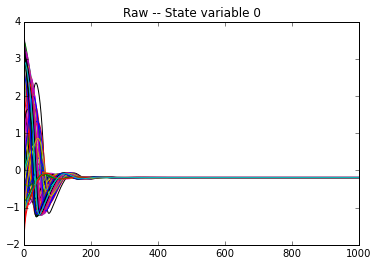

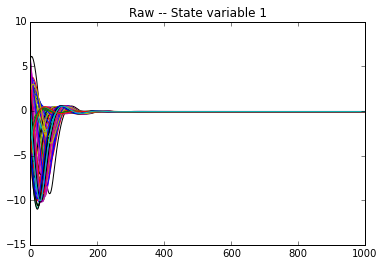

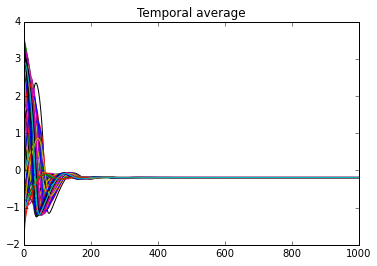

In [9]:
#Plot defaults in a few combinations
#Make the lists numpy.arrays for easier use.
RAW = numpy.array(raw_data)
TAVG = numpy.array(tavg_data)

#Plot raw time series
figure(1)
plot(raw_time, RAW[:, 0, :, 0])
title("Raw -- State variable 0")

figure(2)
plot(raw_time, RAW[:, 1, :, 0])
title("Raw -- State variable 1")

#Plot temporally averaged time series
figure(3)
plot(tavg_time, TAVG[:, 0, :, 0])
title("Temporal average")

#Show them
show()